In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata,how='left', on= "Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(combined_data["Mouse ID"].value_counts())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data  = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_data

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data["Mouse ID"]== 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data= combined_data.loc[combined_data['Mouse ID'] != "g989"]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].value_counts())

248

### Summary statistics
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume

In [8]:
#First, let s group by Drug Regimen
grouped_drug = clean_data.groupby(["Drug Regimen"])
grouped_drug

#let's find the mean
drug_mean= grouped_drug.mean()['Tumor Volume (mm3)']

#let s find the median
drug_median= grouped_drug.median()['Tumor Volume (mm3)']
drug_median

#let s find the variance
drug_var = grouped_drug.var()['Tumor Volume (mm3)']
drug_var

#let s find the standard deviation
drug_std = grouped_drug.std()['Tumor Volume (mm3)']
drug_std

#let s find the SEM
drug_sem = grouped_drug.sem()['Tumor Volume (mm3)']
drug_sem

# # Assemble the resulting series into a single summary dataframe.
summary1 = pd.DataFrame({"Mean Tumor Volume": drug_mean , "Median Tumor Volume": drug_median, "Tumor Volume Variance": drug_var, "Tumor Volume Std. Dev":drug_std, "Tumor Volume Std. Err": drug_sem })
summary1


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary2 = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

### Bar and Pie Charts

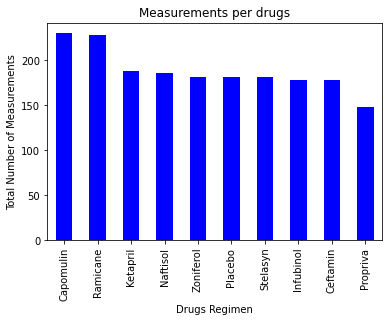

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#let's count the total number of measurements for each drugs
drug_count = clean_data['Drug Regimen'].value_counts()


# insert out x and y axis 
y_axis= drug_count.values
x_axis= drug_count.index

#let's plot the chart
drug_count.plot(kind="bar", facecolor='blue',)

#let's format the chart
plt.ylabel("Total Number of Measurements")
plt.xlabel("Drugs Regimen")
plt.title("Measurements per drugs")
plt.xticks(rotation=90)
plt.show()


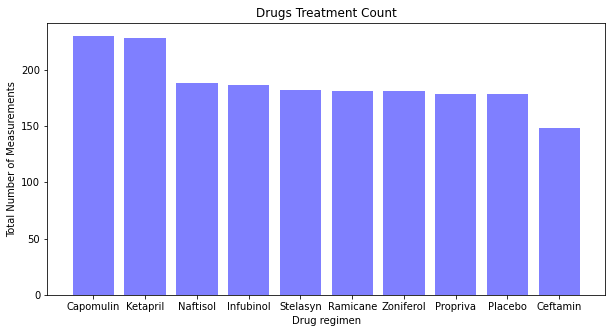

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot
#create list of drug for x_axis
drug_list = clean_data['Drug Regimen'].unique().tolist()
drug_list

#create count list for Y_axis
drug_count = clean_data['Drug Regimen'].value_counts().tolist()
drug_count

#assign axis
x_axis = drug_list
y_axis = drug_count

#Plot the chart
plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align="center")

plt.ylabel("Total Number of Measurements")
plt.xlabel("Drug regimen")
plt.title("Drugs Treatment Count")
plt.show()

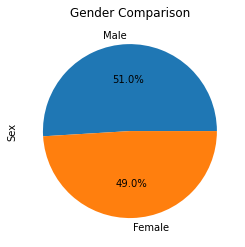

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = clean_data["Sex"].value_counts()
sex_count

#color of 
colors=["blue", "orange"]

#Create the pie based upon the values above
sex_count.plot(kind="pie",autopct="%1.1f%%")

#Formatting
plt.title("Gender Comparison")
plt.ylabel("Sex")
plt.show()

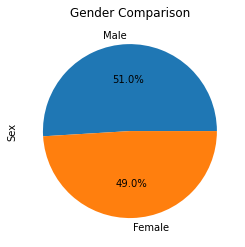

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_count =clean_data["Sex"].value_counts()

#Labels for each section of our pie chart
labels= sex_count.index

#Values of each section of our pie chart
sizes= sex_count.values

#Colors of each section
colors=["blue", "orange"]

# let's create our pie chart using pandas
plt.pie(sizes, labels=labels, autopct="%1.1f%%")

#Formatting
plt.title("Gender Comparison")
plt.ylabel("Sex")
plt.show()


### Quartiles, Outliers and Boxplots

In [14]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_data.groupby(["Mouse ID"]).max()['Timepoint']
max_time

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_time = max_time.reset_index()
max_time
merge_columns = pd.merge(max_time, clean_data ,how='left', on= ["Mouse ID","Timepoint"])
merge_columns

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [65]:
# Put treatments into a list for for loop (and later for plot labels)


drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]



In [69]:
# drug_list = clean_data['Drug Regimen'].unique().tolist()
# grouped_drug = clean_data.groupby(["Drug Regimen"])
# grouped_drug

# set up lists to hold volume info
t_volume = []
# Loop through the list 
for drugs in drug_list:
    tumor_volume = merge_columns.loc[merge_columns["Drug Regimen"]== drugs]['Tumor Volume (mm3)']
    t_volume.append(tumor_volume)
    #print(drugs, tumor_volume)
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = tumor_volume.loc[(tumor_volume<lower_bound)|(tumor_volume>upper_bound)]
    print(drugs, outlier)

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


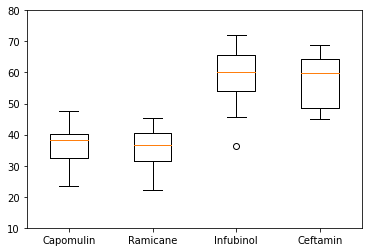

In [71]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(t_volume, labels= drug_list)
plt.ylim(10, 80)
plt.show()

### Line and Scatter Plots

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
9,f993,0,45.0,0,Naftisol,Male,21,28
10,z234,0,45.0,0,Naftisol,Female,19,27
11,b559,0,45.0,0,Naftisol,Male,20,26
13,x930,0,45.0,0,Naftisol,Male,13,26
